# Figures for the EUC diagram ... 

In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from xmitgcm import open_mdsdataset
import ecco_v4_py as ecco
import pych.ecco as pe
import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean

from pych.plot import nice_inward_ticks

In [2]:
fig_dir = '/workspace/results/eccov4r4/equatorial-under-current/figures/'
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

In [3]:
uvel_download_dir = '/workspace/ecco/release4/nctiles_monthly/UVELMASS/*/*.nc'
vvel_download_dir = '/workspace/ecco/release4/nctiles_monthly/VVELMASS/*/*.nc'

In [4]:
ds = xr.open_mfdataset(glob(uvel_download_dir)+glob(vvel_download_dir),combine='by_coords')

In [5]:
g = pe.read_mds('/workspace/grids/llc90',iters=None)

/workspace/xmitgcm/xmitgcm/mds_store.py:854: UserWarning: Couldn't find available_diagnostics.log in /workspace/grids/llc90 or /workspace/grids/llc90. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))


In [6]:
for fld in ['drF','dyG','dxG','XC','XG','Zl','Zu','Zp1']:
    ds[fld] = g[fld]
    ds = ds.set_coords(fld)

## Get time mean velocities

In [7]:
ds['UVELMASS'] = ds.UVELMASS.sel(time=slice('1993','2017')).mean('time').load();
ds['VVELMASS'] = ds.VVELMASS.sel(time=slice('1993','2017')).mean('time').load();

In [8]:
ds['dyG'].load();
ds['dxG'].load();
ds['drF'].load();
ds['XC'].load();
ds['YC'].load();

In [9]:
grid = ecco.get_llc_grid(g)

## Plot the velocities

In [10]:
uvel, vvel = ecco.vector_calc.UEVNfromUXVY(ds.UVELMASS,ds.VVELMASS,ds,grid=grid)

In [11]:
plt.rcParams.update({'text.usetex':True,'font.size':18,'axes.labelsize':18,'axes.titlesize':22})

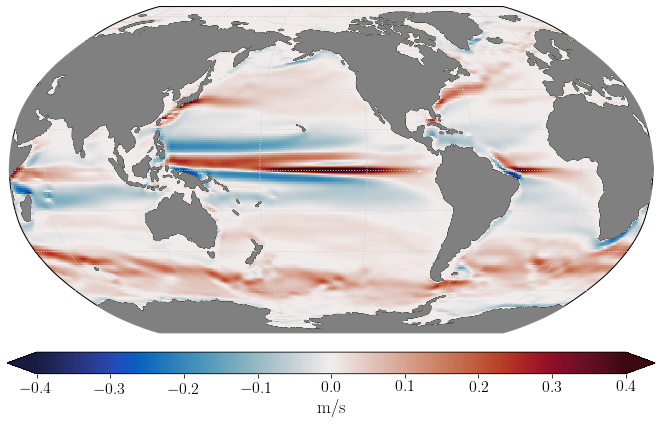

In [28]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
fig,ax,p,cbar,_,_,_ = ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,uvel.isel(k=10),
                              show_colorbar=False,cmap='cmo.balance',user_lon_0=-140,
                              show_grid_lines=False,cmin=-.4,cmax=.4);

ax.add_feature(cf.LAND,zorder=200,color='gray')
ax.gridlines(crs=ccrs.PlateCarree(),linewidth=1,color='lightgray',alpha=1,linestyle=':',zorder=100)

cax = fig.add_axes([0.1375,0.03,.75,.05])
fig.colorbar(p,cax=cax,ax=ax,orientation='horizontal',label='m/s',extend='both')
fig.savefig(f'{fig_dir}/eccov4r4_ubar_105m.png',bbox_inches='tight',dpi=300)

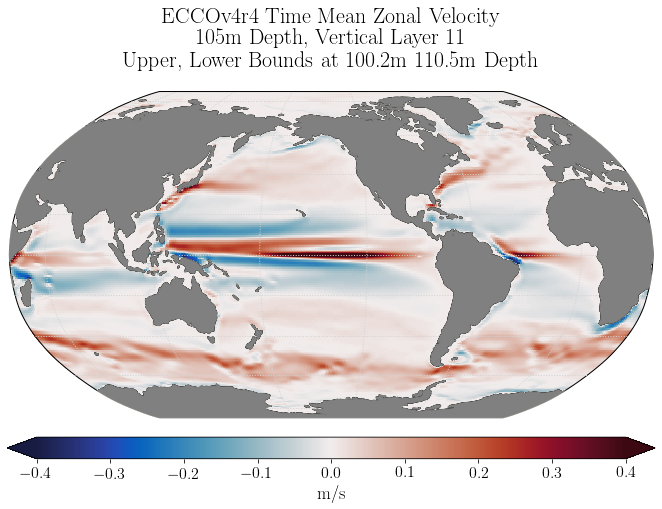

In [29]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
fig,ax,p,cbar,_,_,_ = ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,uvel.isel(k=10),
                              show_colorbar=False,cmap='cmo.balance',user_lon_0=-140,
                              show_grid_lines=False,cmin=-.4,cmax=.4);

ax.add_feature(cf.LAND,zorder=200,color='gray')
ax.gridlines(crs=ccrs.PlateCarree(),linewidth=1,color='lightgray',alpha=1,linestyle=':',zorder=100)

cax = fig.add_axes([0.1375,0.03,.75,.05])
fig.colorbar(p,cax=cax,ax=ax,orientation='horizontal',label='m/s',extend='both')
ax.set_title('ECCOv4r4 Time Mean Zonal Velocity\n105m Depth, Vertical Layer 11\nUpper, Lower Bounds at 100.2m 110.5m Depth',
             pad=25)
fig.savefig(f'{fig_dir}/eccov4r4_ubar_105m_labelled.png',bbox_inches='tight',dpi=300,pad_inches=1)




## Load up the EUC

In [14]:
euc = xr.open_dataset('/workspace/results/eccov4r4/equatorial-under-current/euc_eccov4r4.nc')

In [15]:
lon = -140
usel = euc.u_eq.sel(lon=-140)

In [16]:
usel['d'] = -usel.Z

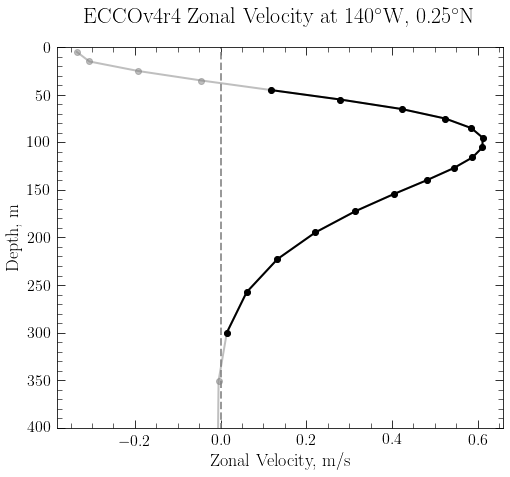

In [23]:
fig,ax = plt.subplots(1,1,figsize=(8,7))

usel.plot(y='d',ax=ax,color='gray',alpha=.5,marker='o')
usel.where(usel>0).plot(y='d',ylim=[400,0],ax=ax,color='black',marker='o')

ax.axvline(0,ymin=400,ymax=0,color='gray',alpha=.8,linestyle='--')
ax.set(ylabel='Depth, m',xlabel='Zonal Velocity, m/s');
ax.set_title(r'ECCOv4r4 Zonal Velocity at 140$^\circ$W, 0.25$^\circ$N',pad=25)
nice_inward_ticks(ax,xminor_skip=.05,yminor_skip=10)

fig.savefig(f'{fig_dir}/eccov4r4_ueq_140w.png',bbox_inches='tight',dpi=300,pad_inches=1)

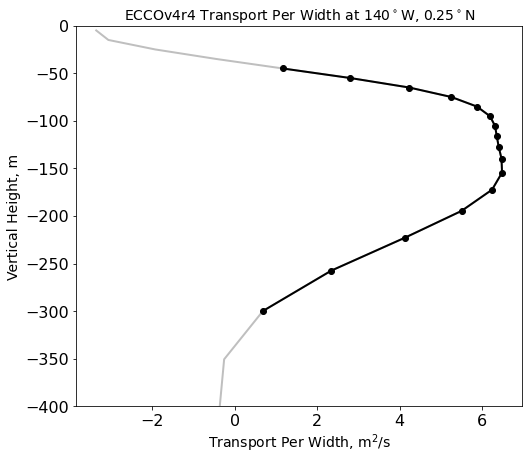

In [74]:
fig,ax = plt.subplots(1,1,figsize=(8,7))
(usel*ds.drF).plot(y='Z',ax=ax,color='gray',alpha=.5)
(usel*ds.drF).where(usel>0).plot(y='Z',ylim=[-400,0],ax=ax,color='black',marker='o')
ax.set(ylabel='Vertical Height, m',xlabel=r'Transport Per Width, m$^2$/s',
       title=r'ECCOv4r4 Transport Per Width at 140$^\circ$W, 0.25$^\circ$N');
fig.savefig(f'{fig_dir}/eccov4r4_uperwidth_140w.png',bbox_inches='tight',dpi=300)